In [1]:
# colab library 

# numerical library:
import numpy as np
import math

# data manipulation library:
import pandas as pd

# standard packages used to handle files:
import sys
import os 
import glob
import time
import datetime
from datetime import datetime
# scikit-learn machine learning library:
import sklearn

# plotting:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# model preprocessing 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Determining distribution of data 
from fitter import Fitter, get_common_distributions, get_distributions

# models used
# Unsupervised Learning
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Supervised Learning
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor)
import lazypredict
import lightgbm as ltb
from lazypredict.Supervised import LazyRegressor

# deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# models evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score



In [2]:
#import datasets from datasets folder using pandas 
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')

<a id ='eda'> </a>

## Exploratory Data Analysis

In [3]:
train_data[train_data['Functioning Day']=='Yes'].describe()

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),E-scooter Count
count,4829.00,4829.00,4829.00,4829.00,4829.00,4829.00,4829.00,4829.00,4829.00,4829.00
mean,11.56,12.70,58.19,1.72,1430.26,3.87,0.56,0.17,0.08,729.11
std,6.94,12.16,20.42,1.03,611.33,13.29,0.87,1.26,0.43,644.48
min,0.00,-17.50,0.00,0.00,27.00,-29.80,0.00,0.00,0.00,2.00
25%,6.00,2.90,42.00,1.00,927.00,-5.30,0.00,0.00,0.00,212.00
50%,12.00,13.40,57.00,1.50,1680.00,4.60,0.01,0.00,0.00,540.00
75%,18.00,22.70,74.00,2.30,2000.00,15.20,0.91,0.00,0.00,1088.00
max,23.00,39.40,98.00,7.30,2000.00,27.20,3.52,35.00,8.80,3556.00


- The target variable (E-scooter Count) which refers to the number e-scooters used at a particular hour (over the duration of 2 years) ranges between 2 to 3404
- Its mean is 725
- Its median is 535.5
- Its 75th percentile is 1076
<br><br>
<b>Hypothesis:</br> This is suggestes that the data is dense at lower values and it's gradually less dense as the values of e-scooter counts grow
This is kinda expected as usually there are some peek hours where e-scooters are being used (probably morning until 18:00) </b>

**Question : How many Hour samples do we have per day ?**
<br><br>Answer : -We can observe that for some days we have more hours (data points) than for others
<br> -->Our dataset is an irregular timeseries

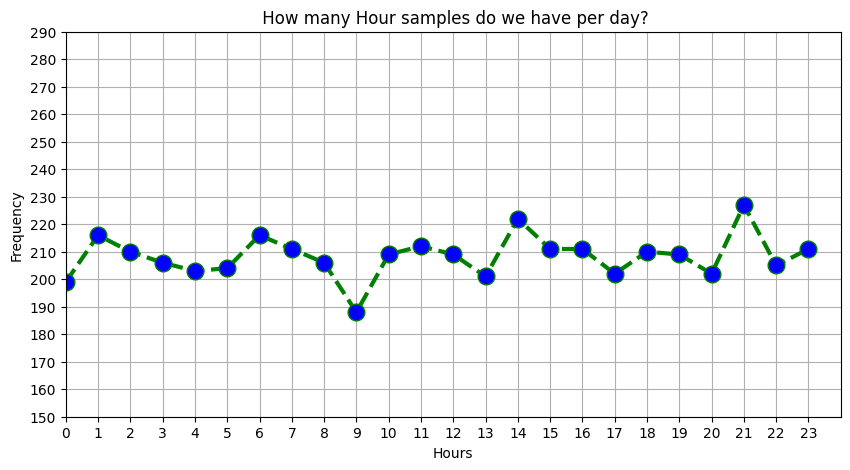

In [58]:
temp = pd.DataFrame(train_data["Hour"].value_counts()).reset_index().sort_values(by="index")
# x axis values
x = temp["index"]
# corresponding y axis values
y = temp["Hour"]
plt.figure(figsize=(10,5))

# plotting the points 
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
  
# setting x and y axis range
plt.xlim(0,24)
plt.xticks([i for i in range(0,24)])
plt.yticks([10 * i for i in range(15,30)])

# naming the x axis
plt.xlabel('Hours')
# naming the y axis
plt.ylabel('Frequency')
plt.grid(True)
# giving a title to my graph
plt.title(' How many Hour samples do we have per day?')
# function to show the plot
plt.show()

In [59]:
train_data

,Date,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,E-scooter Count
0,07/10/2018,22,13.60,38,1.50,2000,-0.40,0.00,0.00,0.00,Autumn,No Holiday,Yes,1160
1,04/02/2018,0,-10.40,49,2.40,2000,-19.00,0.00,0.00,0.00,Winter,No Holiday,Yes,98
2,31/07/2018,20,33.50,50,2.10,2000,21.60,0.04,0.00,0.00,Summer,No Holiday,Yes,1772
3,15/09/2018,0,21.80,83,1.50,2000,18.70,0.00,0.00,0.00,Autumn,No Holiday,Yes,906
4,10/03/2018,6,1.10,78,1.10,538,-2.30,0.00,0.00,0.00,Spring,No Holiday,Yes,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19/08/2018,11,28.40,43,1.00,1914,14.60,1.52,0.00,0.00,Summer,No Holiday,Yes,795
4996,06/01/2018,19,-1.20,37,1.20,1663,-14.00,0.00,0.00,0.00,Winter,No Holiday,Yes,207
4997,16/11/2018,12,13.40,48,2.30,962,2.50,1.64,0.00,0.00,Autumn,No Holiday,Yes,886
4998,23/01/2018,3,-8.60,68,3.30,2000,-13.40,0.00,0.00,1.00,Winter,No Holiday,Yes,55


Question : What does the distribution of E-Scooter Counts look like ?<br>
Answer : E-Scooter Counts follows the gamma distribution

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.46it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.00,1820.39,-112174.24,inf,0.04,0.00
exponpow,0.00,1740.17,-109154.80,inf,0.12,0.00
gamma,0.00,1851.84,-108028.36,inf,0.11,0.00
powerlaw,0.00,1661.66,-102968.19,inf,0.33,0.00
rayleigh,0.00,1951.05,-102704.23,inf,0.15,0.00


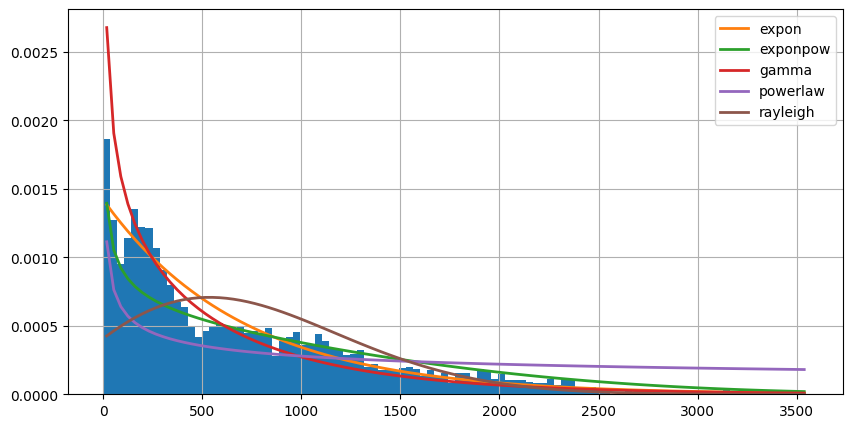

In [60]:
e_scooter = train_data["E-scooter Count"].values

plt.figure(figsize=(10,5))
f = Fitter(e_scooter,
           distributions= get_common_distributions())
f.fit()
f.summary()
f.fit()
f.summary()

In [61]:
f.get_best(method = 'sumsquare_error')


{'expon': {'loc': 0.0, 'scale': 704.1734}}

Data follows the exponential distribution


**Question: what does the relationship between the Hour of the day and the E scooter Count look like ?**<br><br>


In [121]:
functioning_days = train_data[train_data['Functioning Day']=='Yes']

In [63]:
def plot_based_on_date(date):
  plt.figure(figsize=(10,5))
  plt.title(f'How many scooter per hour on the {date}')
  x = train_data[train_data["Date"]== date].sort_values(by="Hour")["Hour"].values
  y = train_data[train_data["Date"]== date].sort_values(by="Hour")["E-scooter Count"].values
  labels = train_data[train_data["Date"]== date].sort_values(by="Hour")["Hour"].values
  plt.grid(True)
  plt.plot(x,y)
  plt.xticks(labels)
  plt.show()

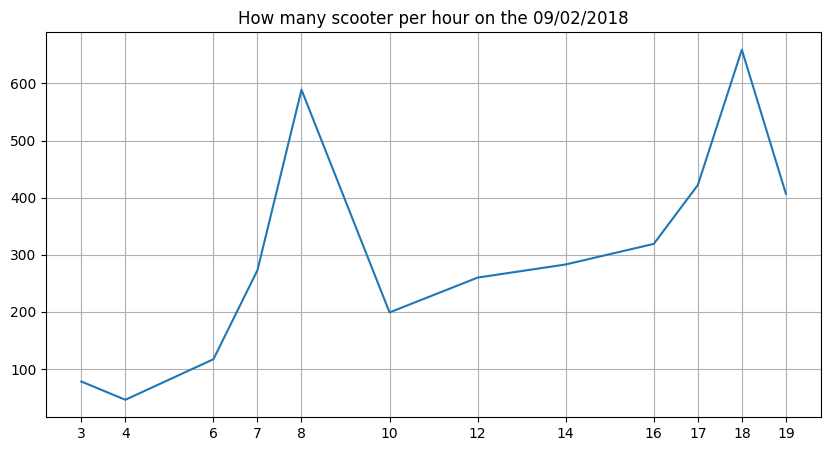

In [64]:
# plotting a randomDay
plot_based_on_date("09/02/2018")

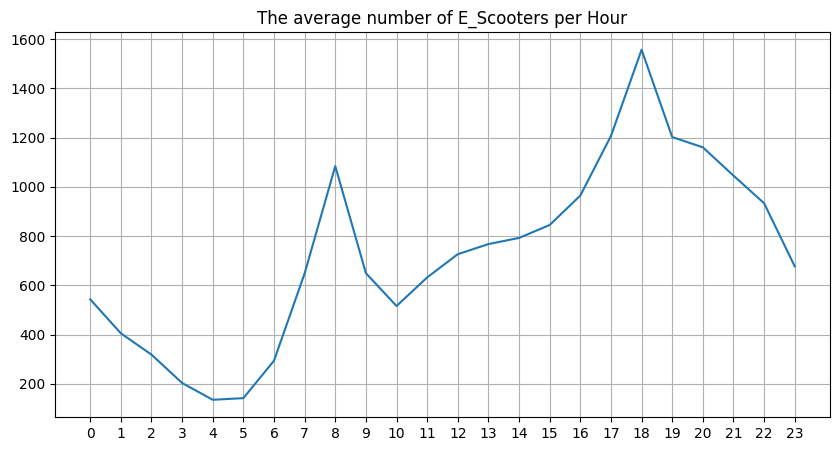

In [65]:
plt.figure(figsize=(10,5))
plt.title(f'The average number of E_Scooters per Hour')
plt.grid(True)
plt.xticks([i for i in range(0,24)])

plt.plot(functioning_days.groupby(["Hour"]).mean()["E-scooter Count"]) 

Answer : There seems to be a pattern emerging : <br>
- Growing number of e scooters from 5 to 8  where it peeks (assumption : when people go to work/school)<br>
- Decrease in the number of e scooters in between 8 and 10 
- steady increase from 10 to 16 then the rate increase grows fast from 17 to 18 where it peeks again(assumptions: people going home or out).
- Decrease after that


Question : What is the effect of weather on the number of e-scooters per hour ?

In [122]:

weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
functioning_days['WeekDay'] = functioning_days["Date"].apply(lambda i:datetime.strptime(i,'%d/%m/%Y').weekday())
functioning_days['WeekDay'] = functioning_days['WeekDay'].map(lambda x : weekdays[x])
functioning_days = functioning_days.drop(axis=0,columns=["Functioning Day"])
functioning_days['Holiday'] = functioning_days['Holiday'].map(lambda x : 0 if x =='No Holiday' else 1	)

In [67]:
functioning_days

,Date,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,E-scooter Count,WeekDay
0,07/10/2018,22,13.60,38,1.50,2000,-0.40,0.00,0.00,0.00,Autumn,0,1160,Sunday
1,04/02/2018,0,-10.40,49,2.40,2000,-19.00,0.00,0.00,0.00,Winter,0,98,Sunday
2,31/07/2018,20,33.50,50,2.10,2000,21.60,0.04,0.00,0.00,Summer,0,1772,Tuesday
3,15/09/2018,0,21.80,83,1.50,2000,18.70,0.00,0.00,0.00,Autumn,0,906,Saturday
4,10/03/2018,6,1.10,78,1.10,538,-2.30,0.00,0.00,0.00,Spring,0,74,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19/08/2018,11,28.40,43,1.00,1914,14.60,1.52,0.00,0.00,Summer,0,795,Sunday
4996,06/01/2018,19,-1.20,37,1.20,1663,-14.00,0.00,0.00,0.00,Winter,0,207,Saturday
4997,16/11/2018,12,13.40,48,2.30,962,2.50,1.64,0.00,0.00,Autumn,0,886,Friday
4998,23/01/2018,3,-8.60,68,3.30,2000,-13.40,0.00,0.00,1.00,Winter,0,55,Tuesday


In [123]:
workdays= ['Monday','Tuesday','Wednesday','Thursday','Friday']
weekends = ['Saturday','Sunday']

functioning_days['Working'] = functioning_days['WeekDay'].map(lambda x : 1 if x in workdays else 0)
# if it's a holiday , it's not a workday
functioning_days.loc[functioning_days['Holiday'] == 1, ['Working']]=0

In [69]:
functioning_days

,Date,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,E-scooter Count,WeekDay,Working
0,07/10/2018,22,13.60,38,1.50,2000,-0.40,0.00,0.00,0.00,Autumn,0,1160,Sunday,0
1,04/02/2018,0,-10.40,49,2.40,2000,-19.00,0.00,0.00,0.00,Winter,0,98,Sunday,0
2,31/07/2018,20,33.50,50,2.10,2000,21.60,0.04,0.00,0.00,Summer,0,1772,Tuesday,1
3,15/09/2018,0,21.80,83,1.50,2000,18.70,0.00,0.00,0.00,Autumn,0,906,Saturday,0
4,10/03/2018,6,1.10,78,1.10,538,-2.30,0.00,0.00,0.00,Spring,0,74,Saturday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19/08/2018,11,28.40,43,1.00,1914,14.60,1.52,0.00,0.00,Summer,0,795,Sunday,0
4996,06/01/2018,19,-1.20,37,1.20,1663,-14.00,0.00,0.00,0.00,Winter,0,207,Saturday,0
4997,16/11/2018,12,13.40,48,2.30,962,2.50,1.64,0.00,0.00,Autumn,0,886,Friday,1
4998,23/01/2018,3,-8.60,68,3.30,2000,-13.40,0.00,0.00,1.00,Winter,0,55,Tuesday,1


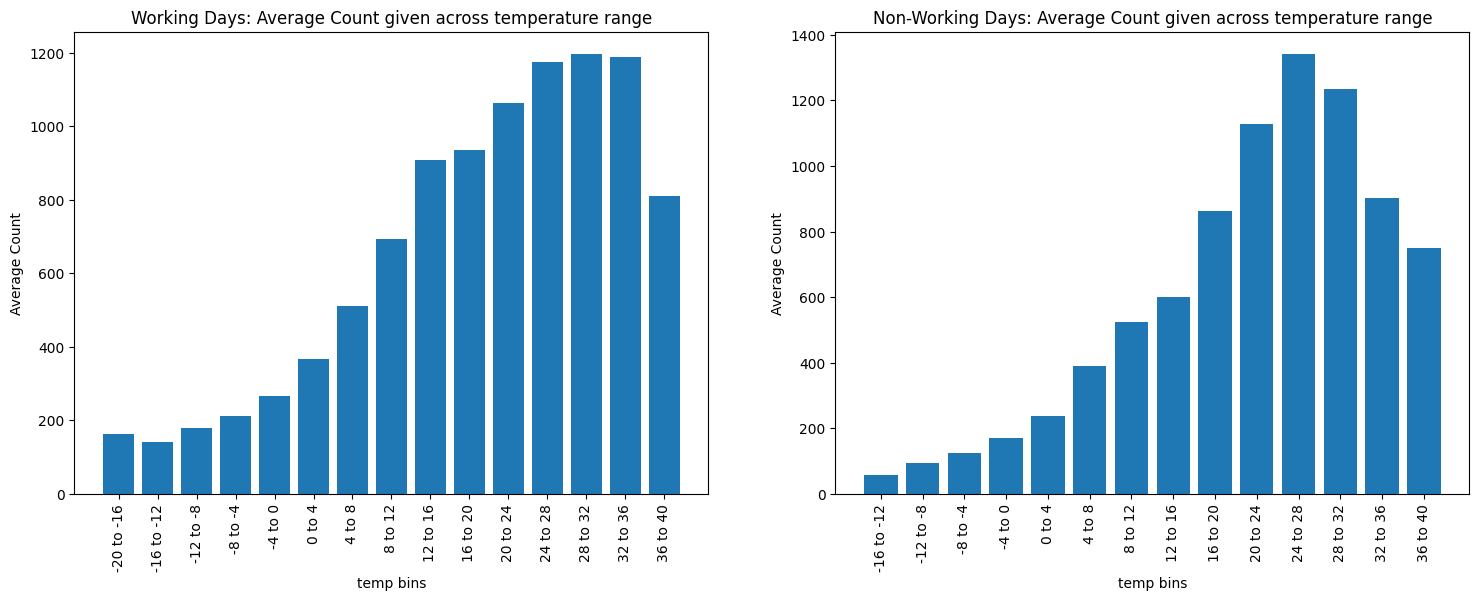

In [99]:
functioning_days_w = functioning_days[functioning_days.Working==1]
functioning_days_nw = functioning_days[functioning_days.Working==0]

bin_size = 4
functioning_days_w['temp_round'] = functioning_days_w['Temperature(C)']//bin_size
functioning_days_nw['temp_round'] = functioning_days_nw['Temperature(C)']//bin_size

minrounds_w = int(functioning_days_w['temp_round'].min())
minrounds_nw = int(functioning_days_nw['temp_round'].min())

maxrounds_w = int(functioning_days_w['temp_round'].max())+1
maxrounds_nw = int(functioning_days_nw['temp_round'].max())+1


mean_count_vs_temp_w = functioning_days_w.groupby('temp_round')['E-scooter Count'].mean()
mean_count_vs_temp_nw = functioning_days_nw.groupby('temp_round')['E-scooter Count'].mean()
idx_w, idx_nw = range(len(mean_count_vs_temp_w)), range(len(mean_count_vs_temp_nw))
labels_w = [str(bin_size*i)+' to '+str(bin_size*(i+1)) for i in range(minrounds_w,maxrounds_w)]
labels_nw = [str(bin_size*i)+' to '+str(bin_size*(i+1)) for i in range(minrounds_nw,maxrounds_nw)]

fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
plt.bar(x=idx_w, height=mean_count_vs_temp_w)
plt.xticks(idx_w, labels_w, rotation=90)
plt.xlabel('temp bins')
plt.ylabel('Average Count')
plt.title('Working Days: Average Count given across temperature range')

axes = fig.add_subplot(1, 2, 2)
plt.bar(x=idx_nw, height=mean_count_vs_temp_nw)
plt.xticks(idx_nw, labels_nw, rotation=90)
plt.xlabel('temp bins')
plt.ylabel('Average Count')
plt.title('Non-Working Days: Average Count given across temperature range')

plt.show()

Oberservation:
- The number of e-scooters always peeks arround 24 to 28 degrees for both working and non working days with an average of arround (1200-1300)
- For Working days the number e scooter rises with the temperatures but starts deeping down from temperatures greater than 28 c (this decrease is not very severe until we reach 36 c )
- For non working days people seem to like using scooters also arround the 24 to 28 C  but they are less likely to tolerate higher temperatures than during working days

**1- Temperature**:<br>
let's assume that the weather is good when it's between 8 and 36  otherwise it's bad

In [124]:
functioning_days["WeatherType"] = functioning_days["Temperature(C)"].map(lambda x : x > 8 and x<36  ).astype('int')


In [125]:
functioning_days

,Date,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,E-scooter Count,WeekDay,Working,WeatherType
0,07/10/2018,22,13.60,38,1.50,2000,-0.40,0.00,0.00,0.00,Autumn,0,1160,Sunday,0,1
1,04/02/2018,0,-10.40,49,2.40,2000,-19.00,0.00,0.00,0.00,Winter,0,98,Sunday,0,0
2,31/07/2018,20,33.50,50,2.10,2000,21.60,0.04,0.00,0.00,Summer,0,1772,Tuesday,1,1
3,15/09/2018,0,21.80,83,1.50,2000,18.70,0.00,0.00,0.00,Autumn,0,906,Saturday,0,1
4,10/03/2018,6,1.10,78,1.10,538,-2.30,0.00,0.00,0.00,Spring,0,74,Saturday,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19/08/2018,11,28.40,43,1.00,1914,14.60,1.52,0.00,0.00,Summer,0,795,Sunday,0,1
4996,06/01/2018,19,-1.20,37,1.20,1663,-14.00,0.00,0.00,0.00,Winter,0,207,Saturday,0,0
4997,16/11/2018,12,13.40,48,2.30,962,2.50,1.64,0.00,0.00,Autumn,0,886,Friday,1,1
4998,23/01/2018,3,-8.60,68,3.30,2000,-13.40,0.00,0.00,1.00,Winter,0,55,Tuesday,1,0


Text(0.5, 1.0, 'Good weather')

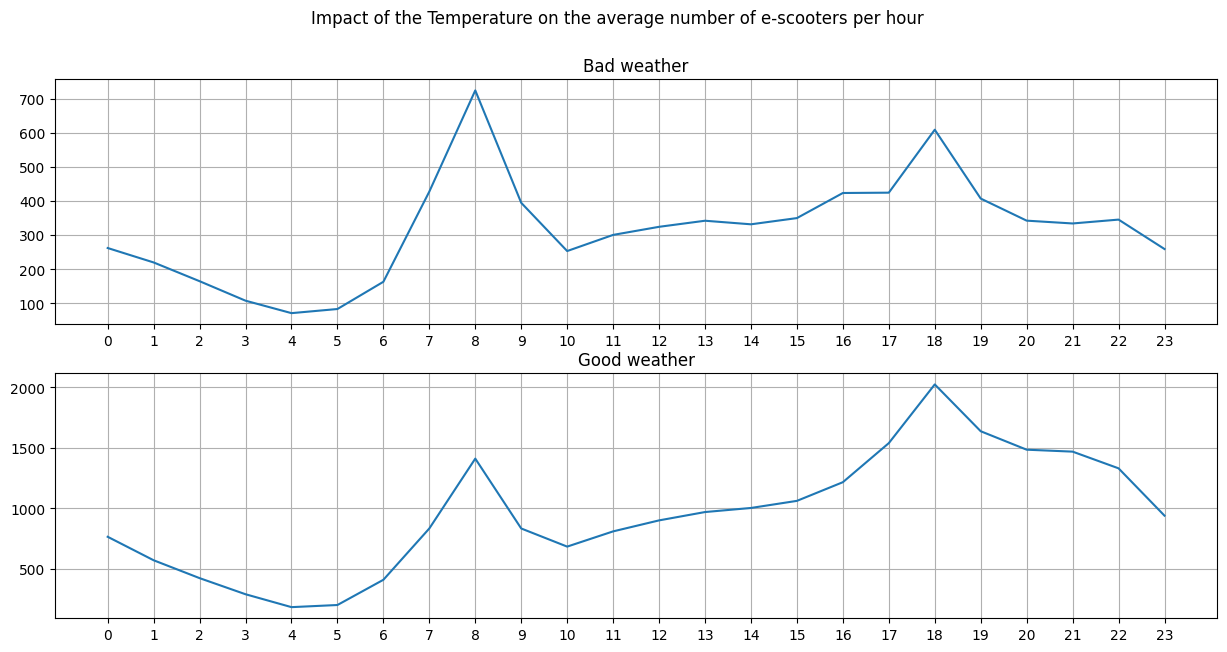

In [73]:
fig, axs = plt.subplots(2,figsize=(15,7))
fig.suptitle('Impact of the Temperature on the average number of e-scooters per hour')

axs[0].set_xticks([i for i in range(24)]) 
axs[1].set_xticks([i for i in range(24)]) 

badWeather = functioning_days[functioning_days['WeatherType']==0]

axs[0].plot([i for i in range(24)],badWeather.groupby(["Hour"]).mean()["E-scooter Count"])
axs[0].grid(True)
axs[0].set_title("Bad weather")


goodWeather =functioning_days[functioning_days['WeatherType']==1]

axs[1].plot([i for i in range(24)],goodWeather.groupby(["Hour"]).mean()["E-scooter Count"])
axs[1].grid(True)
axs[1].set_title("Good weather")


- People will use scooters during rush hours like expected however two pattern are observed

- The number of people using scooters in general is much lower than during good weather
- During the night (from 17 to 18) people are very likely to not use scooters if the weather is bad while the opposite is true
- if it's bad weather people will use the scooter in the morning less than the later hours of thday , this is exactly the inverse if the weather is good

Impact of weekends/ holidays on the escooter count

In [126]:

functioning_days['WeekDay'] = functioning_days["Date"].apply(lambda i:datetime.strptime(i,'%d/%m/%Y').weekday())


In [127]:
functioning_days

,Date,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,E-scooter Count,WeekDay,Working,WeatherType
0,07/10/2018,22,13.60,38,1.50,2000,-0.40,0.00,0.00,0.00,Autumn,0,1160,6,0,1
1,04/02/2018,0,-10.40,49,2.40,2000,-19.00,0.00,0.00,0.00,Winter,0,98,6,0,0
2,31/07/2018,20,33.50,50,2.10,2000,21.60,0.04,0.00,0.00,Summer,0,1772,1,1,1
3,15/09/2018,0,21.80,83,1.50,2000,18.70,0.00,0.00,0.00,Autumn,0,906,5,0,1
4,10/03/2018,6,1.10,78,1.10,538,-2.30,0.00,0.00,0.00,Spring,0,74,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19/08/2018,11,28.40,43,1.00,1914,14.60,1.52,0.00,0.00,Summer,0,795,6,0,1
4996,06/01/2018,19,-1.20,37,1.20,1663,-14.00,0.00,0.00,0.00,Winter,0,207,5,0,0
4997,16/11/2018,12,13.40,48,2.30,962,2.50,1.64,0.00,0.00,Autumn,0,886,4,1,1
4998,23/01/2018,3,-8.60,68,3.30,2000,-13.40,0.00,0.00,1.00,Winter,0,55,1,1,0


[Text(0.5, 0, 'Hour in the day'),
 Text(0, 0.5, 'E-scooter Count'),
 Text(0.5, 1.0, 'Average E-Scooter usage during Weekdays')]

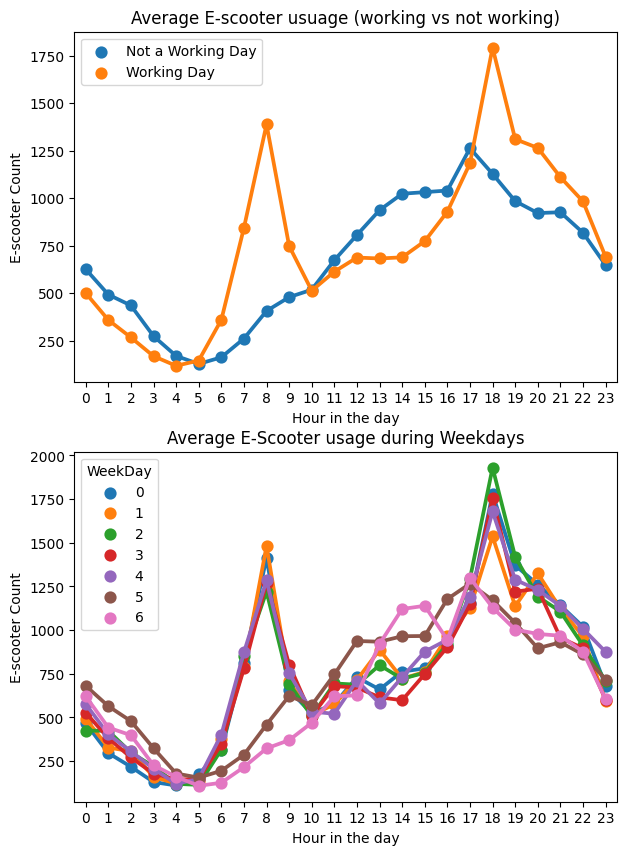

In [76]:

f, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 10))

group_work_hour = pd.DataFrame(functioning_days.groupby(['Working', 'Hour'])['E-scooter Count'].mean()).reset_index()
sns.pointplot(data=group_work_hour, x='Hour', y='E-scooter Count', hue='Working', ax=axes[0])
handles, _ = axes[0].get_legend_handles_labels()

axes[0].legend(handles, ['Not a Working Day', 'Working Day'])
axes[0].set(xlabel='Hour in the day', ylabel='E-scooter Count', title='Average E-scooter usuage (working vs not working)')

hue_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
group_day_hour = pd.DataFrame(functioning_days.groupby(['WeekDay', 'Hour'])['E-scooter Count'].mean()).reset_index()
sns.pointplot(data=group_day_hour, x='Hour', y='E-scooter Count', hue='WeekDay', ax=axes[1])
axes[1].set(xlabel='Hour in the day', ylabel='E-scooter Count', title='Average E-Scooter usage during Weekdays')


We can observe 2 trends One for the workdays and one for the non workdays:<br>
1- If it's a working day : People use e-scooters primary during the rush hours (getting to work or comming home from work) <br>
2- If it's not a working day , people are less likely to use scooters in general, hoever the number of e-scooters grows starting from 6 and continue to grow throughout the day until 18 <br>
3- after 20 pm the same behavior is observed wether it's a holiday or not

In [77]:
np.corrcoef(functioning_days["Working"], functioning_days["E-scooter Count"])[0][1]

0.05887437269131972

The corrolation suggestes that's weather it's a working day or not, is insignificiant 

In [128]:
#functioning_days["Holiday"] = functioning_days["Holiday"].map(lambda x: 1 if x =="Holiday" else 0)
functioning_days["Seasons"] = functioning_days["Seasons"].map(lambda x: ["Winter","Spring","Summer","Autumn"].index(x))


In [81]:
functioning_days

,Date,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,E-scooter Count,WeekDay,Working,WeatherType
0,07/10/2018,22,13.60,38,1.50,2000,-0.40,0.00,0.00,0.00,3,0,1160,6,0,1
1,04/02/2018,0,-10.40,49,2.40,2000,-19.00,0.00,0.00,0.00,0,0,98,6,0,0
2,31/07/2018,20,33.50,50,2.10,2000,21.60,0.04,0.00,0.00,2,0,1772,1,1,1
3,15/09/2018,0,21.80,83,1.50,2000,18.70,0.00,0.00,0.00,3,0,906,5,0,1
4,10/03/2018,6,1.10,78,1.10,538,-2.30,0.00,0.00,0.00,1,0,74,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19/08/2018,11,28.40,43,1.00,1914,14.60,1.52,0.00,0.00,2,0,795,6,0,1
4996,06/01/2018,19,-1.20,37,1.20,1663,-14.00,0.00,0.00,0.00,0,0,207,5,0,0
4997,16/11/2018,12,13.40,48,2.30,962,2.50,1.64,0.00,0.00,3,0,886,4,1,1
4998,23/01/2018,3,-8.60,68,3.30,2000,-13.40,0.00,0.00,1.00,0,0,55,1,1,0


In [130]:
#create dummy variables for categorical variables : seasons
seasons_dummies = pd.get_dummies(functioning_days['Seasons'], prefix='Seasons')
seasons_dummies.columns = ['Winter', 'Spring', 'Summer', 'Autumn']
functioning_days = pd.concat([functioning_days, seasons_dummies], axis=1)

In [132]:
functioning_days

,Date,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,E-scooter Count,WeekDay,Working,WeatherType,Winter,Spring,Summer,Autumn
0,07/10/2018,22,13.60,38,1.50,2000,-0.40,0.00,0.00,0.00,3,0,1160,6,0,1,0,0,0,1
1,04/02/2018,0,-10.40,49,2.40,2000,-19.00,0.00,0.00,0.00,0,0,98,6,0,0,1,0,0,0
2,31/07/2018,20,33.50,50,2.10,2000,21.60,0.04,0.00,0.00,2,0,1772,1,1,1,0,0,1,0
3,15/09/2018,0,21.80,83,1.50,2000,18.70,0.00,0.00,0.00,3,0,906,5,0,1,0,0,0,1
4,10/03/2018,6,1.10,78,1.10,538,-2.30,0.00,0.00,0.00,1,0,74,5,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19/08/2018,11,28.40,43,1.00,1914,14.60,1.52,0.00,0.00,2,0,795,6,0,1,0,0,1,0
4996,06/01/2018,19,-1.20,37,1.20,1663,-14.00,0.00,0.00,0.00,0,0,207,5,0,0,1,0,0,0
4997,16/11/2018,12,13.40,48,2.30,962,2.50,1.64,0.00,0.00,3,0,886,4,1,1,0,0,0,1
4998,23/01/2018,3,-8.60,68,3.30,2000,-13.40,0.00,0.00,1.00,0,0,55,1,1,0,1,0,0,0


In [133]:
def draw_corr_matrix(df):
  plt.figure(figsize=(15,15))
  corr_matrix = df.corr()
  sns.heatmap(corr_matrix, annot=True)
  plt.show()

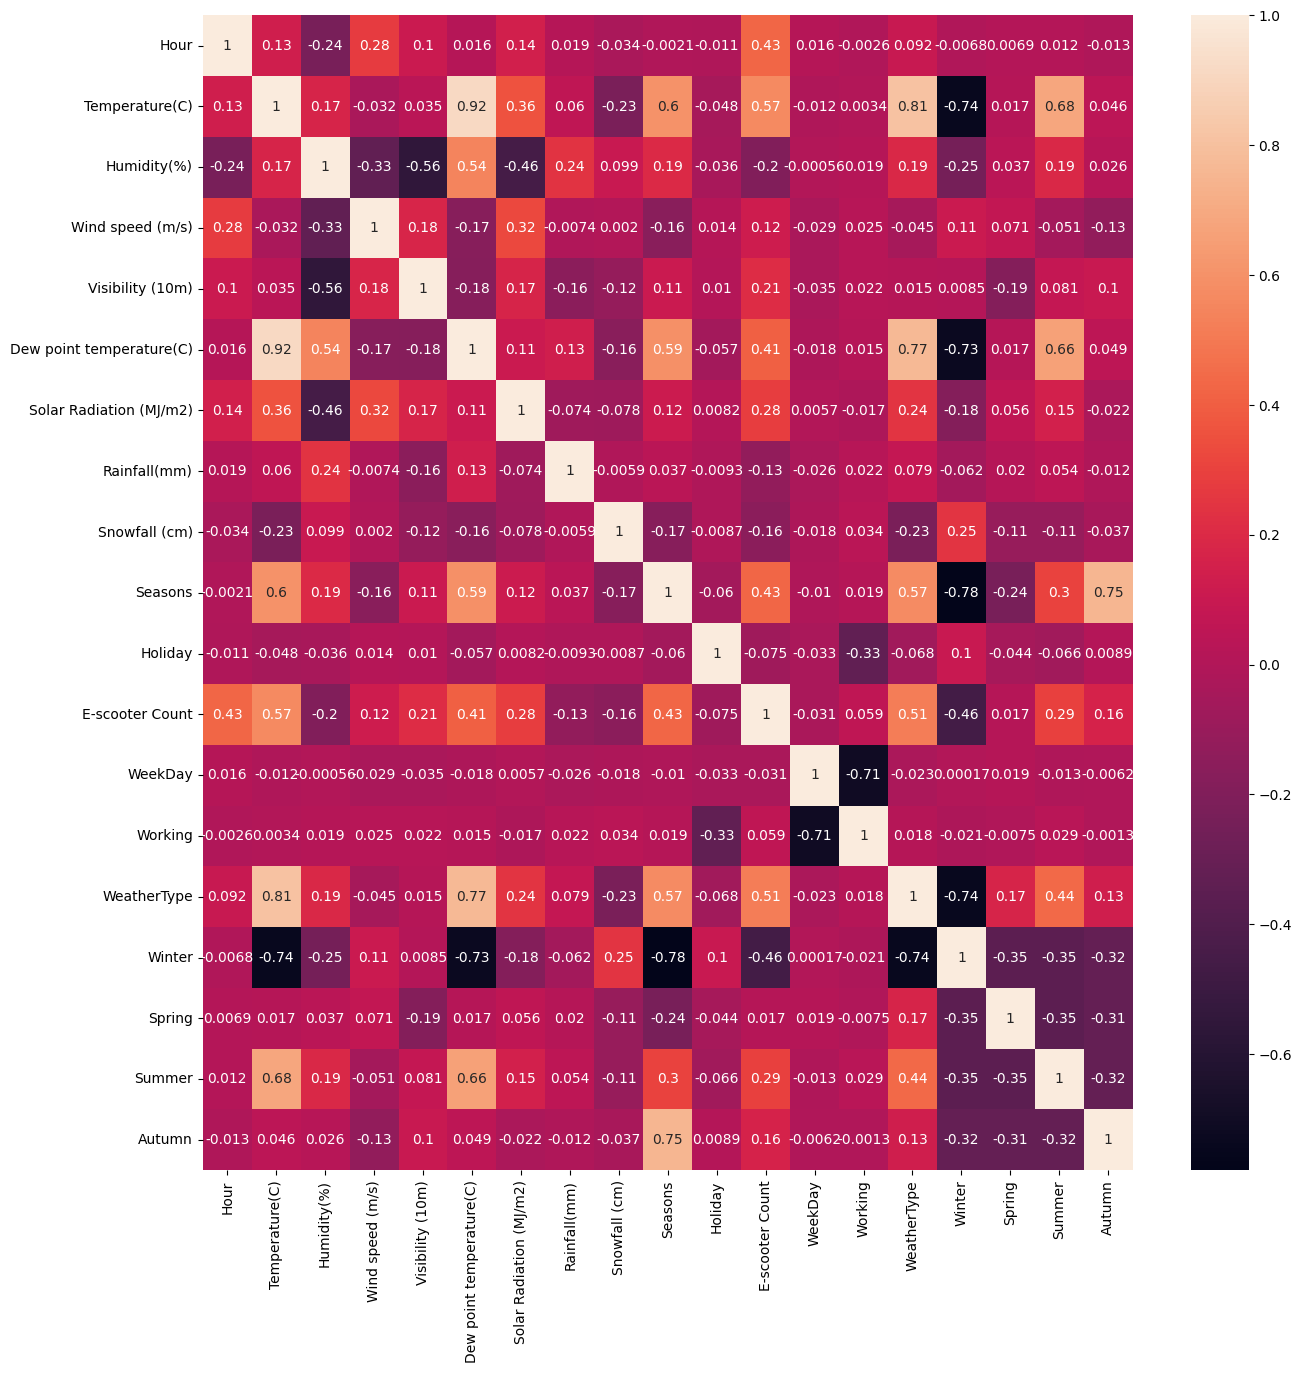

In [134]:
draw_corr_matrix(functioning_days)

# The E- scooter count is best correlation with : <br>
- The Weather
- The Weather Type
- The Hour of the Day
- The Dew Point Temperature 
- The seasons
<br>===================<br>
All the Features are correlated with temperature of the air
# The E- scooter count is not correlated with:
- the weekdays
- holidays 
- it's a working day or not : <br>
- spring has no correlation with the count <br>
- Also Rainfall and windspeed are not highly correlated with the count (0.12 and  -0.13 respectively)


# Feature Extraction

In [172]:
def preprocess(dataset,test=False):
  df = dataset.copy()
  #create dummy variables for categorical variables : seasons

  df["Rush_Hours"] = df["Hour"].apply(lambda hour:1 if (hour in range(6,10) or hour in range(17,21)) else 0 )
  df["WeatherType"] = df["Temperature(C)"].map(lambda x : x > 8 and x<36  ).astype('int')

  features = ['Hour', 'Temperature(C)', 'Humidity(%)',
       'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Snowfall (cm)',
       'E-scooter Count','Year',
       'Summer',"Rush_Hours", 'Winter','Autumn','WeatherType','Functioning Day']
  if (test):
    features.remove('E-scooter Count')
  df["Year"] = pd.DatetimeIndex(df['Date']).year
  df['Month'] = pd.DatetimeIndex(df['Date']).month
  
  df = pd.get_dummies(df, columns=['Seasons'], prefix='', prefix_sep='')
  df['old_index'] = df.index
  features.append('old_index')
  return df[features]

# data preparation

In [173]:
#split data into two datasets based on the functioning day
def split_functioning_days(df):
  df_copy = df.copy()
  return df_copy[df_copy['Functioning Day'] == 'Yes'],df_copy[df_copy['Functioning Day'] == 'No']

#merge the two datasets
def merge_functioning_days(functioning_days,non_functioning_days):
    return pd.concat([functioning_days,non_functioning_days],axis=0).sort_values(by='old_index').drop('old_index',axis=1)


In [174]:
#split based on the functioning day
preprocessed_data = preprocess(train_data)
functioning_days_train,non_functioning_days_train = split_functioning_days(preprocessed_data)


In [175]:
X_TRAIN = functioning_days_train.drop(axis=0,columns=["E-scooter Count",'Functioning Day','old_index'])
Y_TRAIN = functioning_days_train["E-scooter Count"]


Temperature(C): 0.36320677335730195
Hour: 0.27818281136177314
Humidity(%): 0.11794606609290516
Solar Radiation (MJ/m2): 0.10279469538217144
Dew point temperature(C): 0.03871400304644114
Rush_Hours: 0.03427695912992079
Visibility (10m): 0.027123209616172227
Autumn: 0.024188889908952755
Winter: 0.00986199063701681
Summer: 0.0022269321434828216
Year: 0.0005517462989167089
Snowfall (cm): 0.0005314498503045382
WeatherType: 0.0003944731746406712


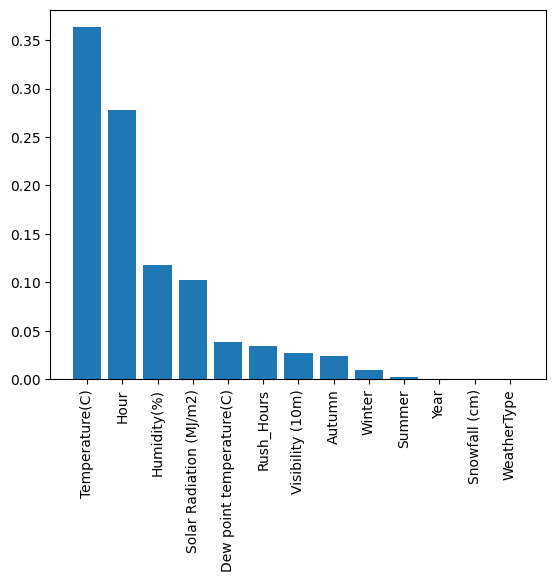

In [176]:
from sklearn.inspection import permutation_importance


x_train, x_test, y_train, y_test = train_test_split(X_TRAIN,Y_TRAIN)

model = RandomForestRegressor()
model.fit(X_TRAIN, Y_TRAIN)

# Calculate the permutation importance of each feature
result = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=0)

# Sort the features by their permutation importance
fi = sorted(zip(model.feature_importances_, X_TRAIN.columns), reverse=True)

# Print the permutation importance of each feature
for feature in fi:
    print(f"{feature[1]}: {feature[0]}")

# Plot the feature importance
features = [x[1] for x in fi]
importance = [x[0] for x in fi]
plt.bar(np.arange(len(features)), importance)
plt.xticks(np.arange(len(features)), features)
plt.xticks(rotation=90)
plt.show()

In [177]:
scaler = StandardScaler()
scaler = scaler.fit(X_TRAIN)
X_TRAIN = scaler.transform(X_TRAIN)

Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 99/121 [=======================>......] - ETA: 0s - loss: 956762.8125 - mae: 732.0035WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001C231C3DB40> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
121/121 [==============================] - 1s 4ms/step - loss: 935402.6875 - mae: 722.9052 - val_loss: 889568.7500 - val_mae: 689.4877
Epoch 2/1000
121/121 [==============================] - 0s 2ms/step - loss: 675287.1875 - mae: 583.1429 - val_loss: 341647.3750 - val_mae: 395.2985
Epoch 3/1000
121/121 [==============================] - 0s 2ms/step - loss: 283188.1562 - mae: 370.3048 - val_loss: 182792.2812 - val_mae: 295.6190
Epoch 4/1000
121/121 [==============================] - 0s 2ms/step - loss: 241497.4219 - mae: 342.9108 - val_loss: 160560.0000 - val_mae: 276.6711
Epoch 5/1000
121/121 [==============================] - 0s 2ms/step - loss: 238177.1719 - mae: 339.0417 - val_loss: 15

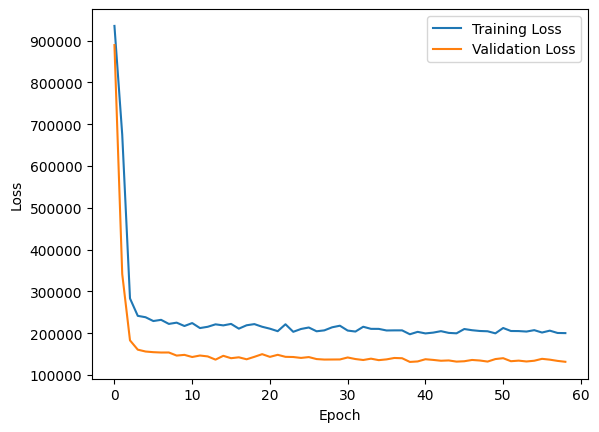

In [199]:
import tensorflow as tf

# Define the input and output layers
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(13,), activation="relu",kernel_regularizer='l2'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(32, activation="relu"))

model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(1))
# Create the model
model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Train the model
history = model.fit(X_TRAIN, Y_TRAIN, epochs=1000, batch_size=32, validation_split=0.2,callbacks=[callback])

# Extract the validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [202]:
preprocessed_test_data = preprocess(test_data,True)
functioning_days_test,non_functioning_days_test = split_functioning_days(preprocessed_test_data)
X_TEST = functioning_days_test.drop(['Functioning Day','old_index'],axis=1)
X_TEST = scaler.transform(X_TEST)
y_pred = model.predict(X_TEST)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
114/114 [==============================] - 0s 1ms/step


In [211]:
save_submition(model_predict(model,scaler,test_data),"NeuralNetwork",)

114/114 [==============================] - 0s 1ms/step


In [201]:
functioning_days_test

,Hour,Temperature(C),Humidity(%),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Snowfall (cm),Year,Summer,Rush_Hours,Winter,Autumn,WeatherType,Functioning Day,old_index
0,16,25.20,87,601,22.80,0.88,0.00,2018,1,0,0,0,1,Yes,0
1,21,7.30,49,2000,-2.70,0.00,0.00,2018,0,0,0,1,0,Yes,1
2,13,3.50,17,1971,-19.30,2.20,0.00,2018,0,0,1,0,0,Yes,2
3,10,30.50,58,1875,21.20,1.84,0.00,2018,1,0,0,0,1,Yes,3
4,17,2.70,50,1957,-6.70,0.06,0.00,2018,0,1,1,0,0,Yes,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755,20,25.00,60,1773,16.60,0.10,0.00,2018,1,1,0,0,1,Yes,3755
3756,20,24.60,65,2000,17.50,0.00,0.00,2018,1,1,0,0,1,Yes,3756
3757,23,19.40,50,2000,8.60,0.00,0.00,2018,0,0,0,1,1,Yes,3757
3758,11,-11.70,27,1935,-26.90,0.94,1.00,2018,0,0,1,0,0,Yes,3758


# Perform Hyper parameter tuning


In [14]:
# train the model using random forest regressor
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
model.fit(X_TRAIN, Y_TRAIN)


RandomForestRegressor(max_depth=10, random_state=0)

In [74]:
# calculate the mean absolute error
def calculate_mae(y_true,y_pred):
    return np.mean(np.abs(y_true - y_pred))

preds = model.predict(X_TRAIN)
mae = calculate_mae(Y_TRAIN,preds)
print("MAE : ",mae)

    

151/151 [==============================] - 0s 1ms/step


ValueError: Data must be 1-dimensional

In [22]:

#hyperparameter tuning of the model
def hyperparameter_tuning(X_TRAIN,Y_TRAIN):
    param_grid = {
        'bootstrap': [True],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['auto'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [100, 200, 300, 1000]
    }
    # Create a based model
    rf = RandomForestRegressor()
    # Instantiate the grid search model
    grid_search = RandomizedSearchCV(estimator = rf, param_distributions= param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)
    grid_search.fit(X_TRAIN, Y_TRAIN)
    return grid_search.best_estimator_

In [23]:
best_model = hyperparameter_tuning(X_TRAIN,Y_TRAIN)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [24]:
mae = calculate_mae(Y_TRAIN,best_model.predict(X_TRAIN))
print(mae)

56.9241157757201


In [113]:
functioning_days_train['preds'] = best_model.predict(X_TRAIN)
non_functioning_days_train['preds'] = 0
merge_functioning_days(functioning_days_train,non_functioning_days_train)['preds']

0      1220.10
1        95.82
2      1749.75
3       892.47
4       110.99
         ...  
4995    819.73
4996    247.46
4997    882.41
4998     57.59
4999    949.73
Name: preds, Length: 5000, dtype: float64

In [208]:
def model_predict(model,scaler,test_data):
  preprocessed_data = preprocess(test_data,test=True)
  # scale the data
  functioning_days_test,non_functioning_days_test = split_functioning_days(preprocessed_data)
  x_test = functioning_days_test.drop(axis=0,columns=['old_index','Functioning Day'])
  x_test = scaler.transform(x_test)
  functioning_days_test['preds'] = model.predict(x_test)
  non_functioning_days_test['preds'] = 0
  return merge_functioning_days(functioning_days_test,non_functioning_days_test)['preds']

In [210]:
def save_submition(preds,name):
  headerList = ["Id","Predicted"]
  id = [int(i) for i in range(len(preds))]


  result = pd.DataFrame([id,preds])
  result = result.T
  result.iloc[:, 0] = result.iloc[:, 0].astype('int')
  # converting data frame to csv
  result.to_csv(f"submissions/{name}.csv", header=headerList, index=False)

In [27]:
save_submition(model_predict(model,scaler,test_data),"random_forest_scaled")

In [77]:
from sklearn.ensemble import StackingRegressor

def get_stacking(input_shape=None):
    '''A stacking model that consists of CatBoostRegressor,
    XGBRegressor, a linear model, and some neural networks'''
    # First we create a list called "level0", which consists of our base models"
    # These models will get passed down to the meta-learner later
    level0 = list()
    level0.append(('XGBRegressor', XGBRegressor()))
    level0.append(('HistGradientBoostingRegressor', HistGradientBoostingRegressor(verbose=False, learning_rate=.0001)))
    level0.append(('RandomForestRegressor', RandomForestRegressor()))
    level0.append(('LGBMRegressor', ltb.LGBMRegressor()))

# The "meta-learner" designated as the level1 model
    # In my experience Linear Regression performs best
    # but feel free to experiment with other models
    level1 = HistGradientBoostingRegressor()
# Create the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=2, verbose=1)
    return model

In [79]:
stacking_model = get_stacking()
stacking_model.fit(X_TRAIN, Y_TRAIN)
preds = model_predict(stacking_model,scaler,test_data)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s finished


In [80]:
save_submition(preds,"stacking_hitscaled")

In [43]:
#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_TRAIN, Y_TRAIN, test_size=0.25, random_state=42)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models_scaled, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [17:52<00:00, 25.53s/it]
